# Iris Flower Machine Learning

### Made By:
    Shagun Bhardwaj (18csu202)
    Tanisha Ahuja (18csu215)

## About the dataset
Dataset Source: https://archive.ics.uci.edu/ml/datasets/Iris

Data Set Information:
This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are not linearly separable from each other. 

Predicted attribute: Class of Iris plant. 

In [96]:
# Importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.metrics import classification_report

In [97]:
# Importing the dataset
dataset = pd.read_csv('Iris.csv')

In [98]:
# Top 10 rows of the dataset
dataset.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [99]:
dataset.shape

(150, 5)

In [100]:
dataset.index

RangeIndex(start=0, stop=150, step=1)

In [101]:
dataset.columns

Index(['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class'], dtype='object')

In [102]:
dataset.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758000,1.199333
std,0.828066,0.433594,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data Preprocessing

In [103]:
# Check out the missing values
#The concept of missing values is important to understand in order to successfully manage data. There is no missing or Nan values present in our dataset.
dataset.isnull().sum()

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class           0
dtype: int64

# Looking for Correlations
    Correlation coeff ranges from -1 to 1.
        1 -> strong positive correlation
        0 -> no correlation
       -1 -> strong negative correlation

<function matplotlib.pyplot.show(*args, **kw)>

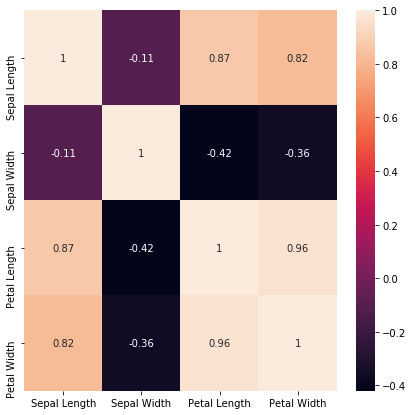

In [104]:
plt.figure(figsize=(7,7))
sns.heatmap(dataset.corr(), annot=True)
plt.show

In [105]:
dataset.corr()['Petal Length'].sort_values(ascending=False)

Petal Length    1.000000
Petal Width     0.962865
Sepal Length    0.871754
Sepal Width    -0.420347
Name: Petal Length, dtype: float64

Text(0.5, 1.0, 'Outlier Box Plot')

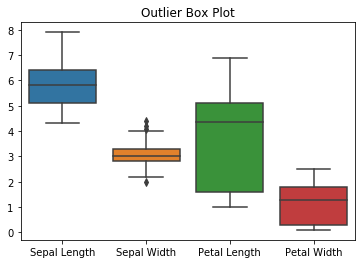

In [106]:
# to check for presence of an outlier
sns.boxplot(data = dataset.iloc[:, 0:4]).set_title("Outlier Box Plot")

## Visualizations

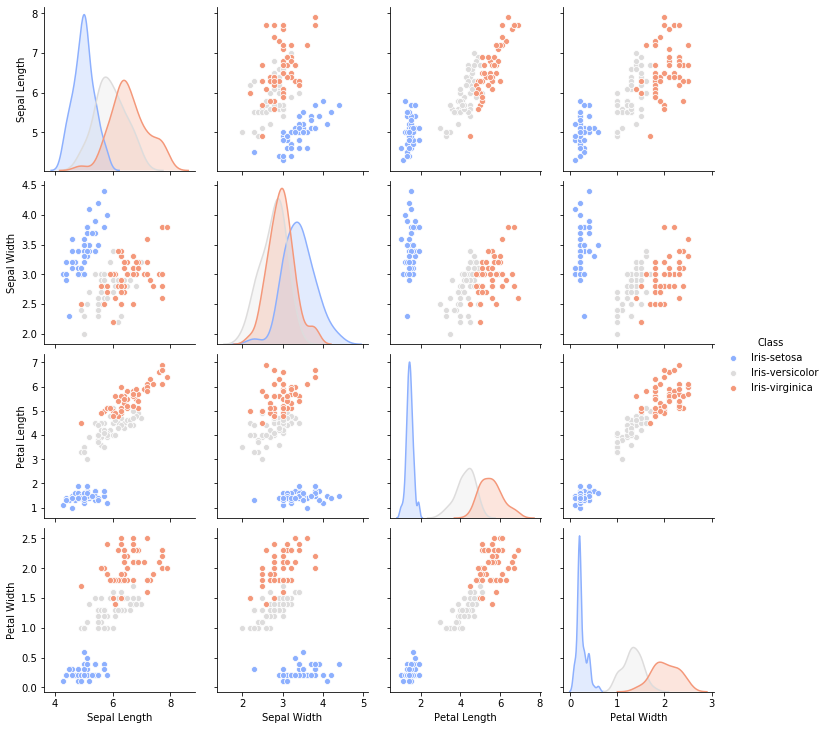

In [107]:
sns.pairplot(dataset,hue='Class',palette='coolwarm')

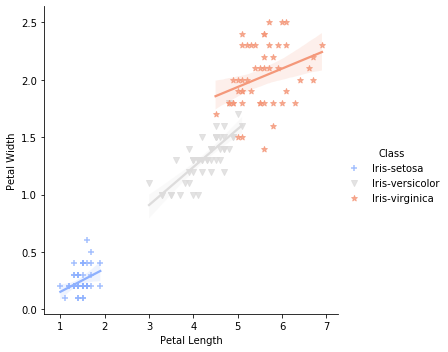

In [108]:
sns.lmplot(x='Petal Length',y='Petal Width',data=dataset,hue='Class',palette='coolwarm',markers=['+','v','*'])

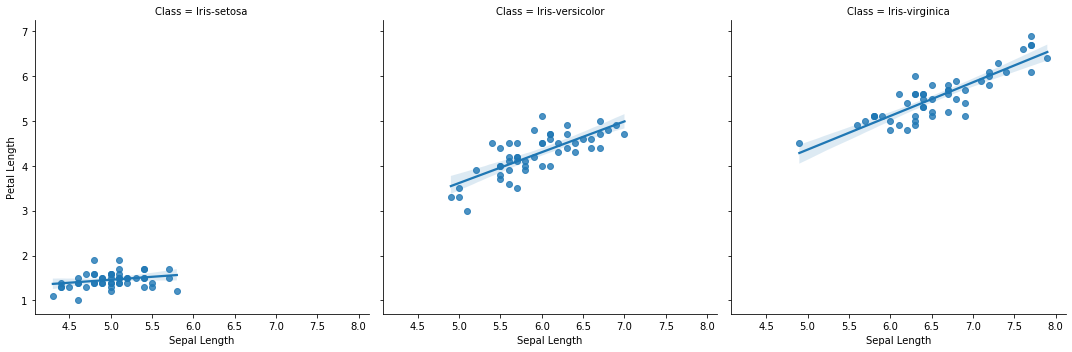

In [109]:
sns.lmplot(x='Sepal Length',y='Petal Length',data=dataset,col='Class')

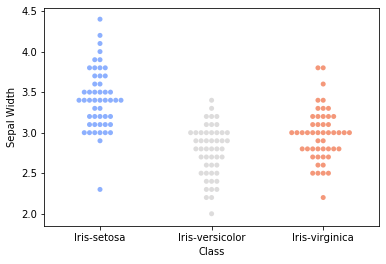

In [110]:
sns.swarmplot(x="Class", y="Sepal Width", data=dataset,palette='coolwarm')

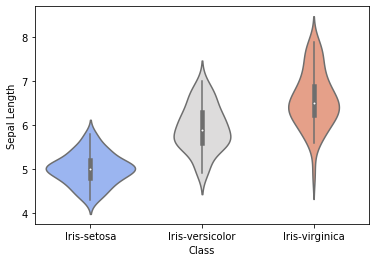

In [111]:
sns.violinplot(x="Class", y="Sepal Length", data=dataset, palette='coolwarm')

# Handling Text and categorical values:
In Iris dataset, there is one column that contains categorical data i.e., "Class" which refers to a species of Iris plant (Iris Setosa, Iris Versicolour, Iris Virginica).

In [112]:
# Replace categorical value with numeric value
dataset['Class'].replace(('Iris-setosa', 'Iris-versicolor','Iris-virginica'),(0,1,2), inplace= True)

In [113]:
dataset.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [114]:
#Take all the columns except last one
X = dataset.iloc[:, 2:4]
#Take the last column as the result
y = dataset.iloc[:, 4]

In [115]:
# Splitting the dataset into the Training set and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [116]:
# Feature Scaling
# Not required because decision trees are not based on eculidian distances
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [117]:
name = []
Scores = []
rmse = []

## Logistic Regression

In [118]:
# Fitting Logistic Regression to the Training set
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# K-Fold cross validation
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

In [119]:
model_accuracy = accuracies.mean()
model_accuracy

0.9643939393939395

In [120]:
model_std = accuracies.std()
model_std

0.05965638522003039

In [121]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0, 15,  1],
       [ 0,  2,  8]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


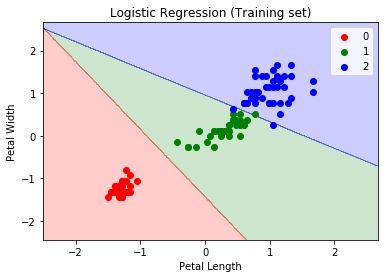

In [122]:
# Visualising the Training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


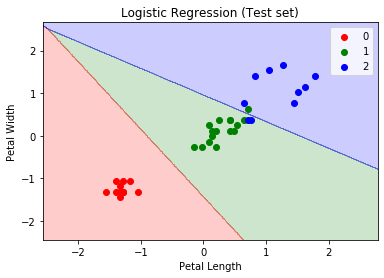

In [123]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In [124]:
# Genarate Reports
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.94      0.91        16
           2       0.89      0.80      0.84        10

    accuracy                           0.92        38
   macro avg       0.92      0.91      0.92        38
weighted avg       0.92      0.92      0.92        38



In [125]:
from sklearn.metrics import mean_squared_error
logr_mse = mean_squared_error(y_test, y_pred)
logr_rmse = np.sqrt(logr_mse)
print("root mean squared error",logr_rmse)


root mean squared error 0.28097574347450816


In [126]:
logr_score=classifier.score(X_test,y_test)
logr_score

0.9210526315789473

In [127]:
name.append('Logistic Regression')
Scores.append(logr_score)
rmse.append(logr_rmse)

## K Nearest neighbours

In [128]:
# Fitting K-NN to the Training set
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# K-Fold cross validation
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

In [129]:
model_accuracy = accuracies.mean()
model_accuracy

0.9553030303030303

In [130]:
model_std = accuracies.std()
model_std

0.06045910212948113

In [131]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0, 16,  0],
       [ 0,  2,  8]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


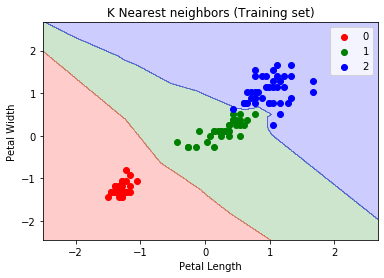

In [132]:
# Visualising the Training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('K Nearest neighbors (Training set)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


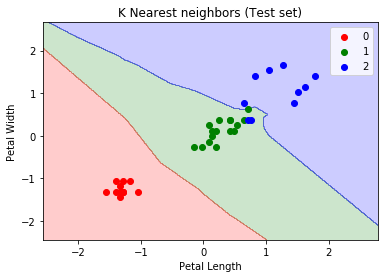

In [133]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('K Nearest neighbors (Test set)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In [134]:
# Genarate Reports
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.89      1.00      0.94        16
           2       1.00      0.80      0.89        10

    accuracy                           0.95        38
   macro avg       0.96      0.93      0.94        38
weighted avg       0.95      0.95      0.95        38



In [135]:
y_pred = classifier.predict(X_test)
knn_mse = mean_squared_error(y_test, y_pred)
knn_rmse = np.sqrt(knn_mse)
knn_rmse

0.22941573387056177

In [136]:
knn_score=classifier.score(X_test,y_test)
knn_score

0.9473684210526315

In [137]:
name.append('K Nearest neighbours')
Scores.append(knn_score)
rmse.append(knn_rmse)

## Decision Tree

In [138]:
# Fitting Decision Tree Classification to the Training set
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [139]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0, 15,  1],
       [ 0,  2,  8]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


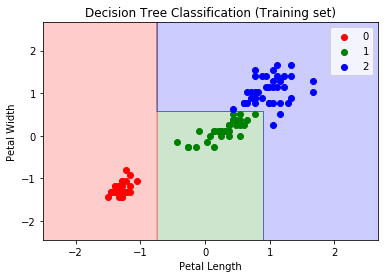

In [140]:
# Visualising the Training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Decision Tree Classification (Training set)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


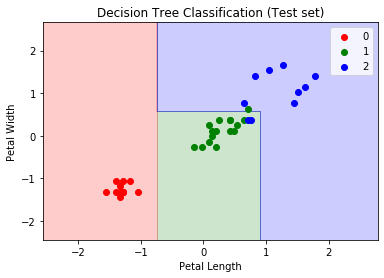

In [141]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In [142]:
# Genarate Reports
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.94      0.91        16
           2       0.89      0.80      0.84        10

    accuracy                           0.92        38
   macro avg       0.92      0.91      0.92        38
weighted avg       0.92      0.92      0.92        38



In [143]:
y_pred = classifier.predict(X_test)
tree_mse = mean_squared_error(y_test, y_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.28097574347450816

In [144]:
tree_score=classifier.score(X_test,y_test)
tree_score

0.9210526315789473

In [145]:
name.append('Decision Tree')
Scores.append(tree_score)
rmse.append(tree_rmse)

## Support Vector Classifier

In [146]:
# Fitting SVM to the Training set
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [147]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[12,  0,  0],
       [ 0, 15,  1],
       [ 0,  2,  8]], dtype=int64)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


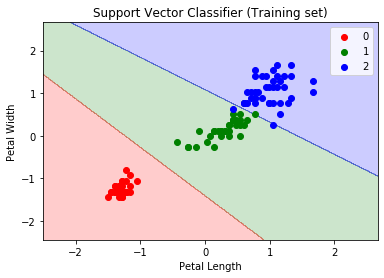

In [148]:
# Visualising the Training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Support Vector Classifier (Training set)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


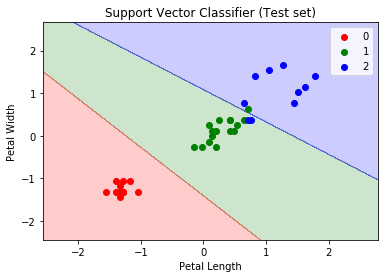

In [149]:
# Visualising the Test set results
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green','blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green','blue'))(i), label = j)
plt.title('Support Vector Classifier (Test set)')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend()
plt.show()

In [150]:
# Genarate Reports
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.88      0.94      0.91        16
           2       0.89      0.80      0.84        10

    accuracy                           0.92        38
   macro avg       0.92      0.91      0.92        38
weighted avg       0.92      0.92      0.92        38



In [151]:
y_pred = classifier.predict(X_test)
svc_mse = mean_squared_error(y_test, y_pred)
svc_rmse = np.sqrt(tree_mse)
svc_rmse

0.28097574347450816

In [152]:
svc_score=classifier.score(X_test,y_test)
svc_score

0.9210526315789473

In [153]:
name.append('Support Vector Classifier')
Scores.append(svc_score)
rmse.append(svc_rmse)

# Summary 

In [154]:
df = pd.DataFrame(Scores,index=name,columns=['Scores'])
df['RMSE'] = rmse
df = df.reset_index()
df['Model'] = df['index']

In [155]:
df.drop('index',axis=1,inplace=True)
df.head()

,Scores,RMSE,Model
0,0.921053,0.280976,logistic regression
1,0.947368,0.229416,K Nearest neighbours
2,0.921053,0.280976,Decision Tree
3,0.921053,0.280976,Support Vector Classifier


 We discover "K Nearest neighbours" algorithm works better for this specific dataset.